In [1]:
import sys
sys.path.append('../../src/')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from utils.utils import train_data, plot_results


%matplotlib inline

In [8]:
name = "Cutoff = 0.2, 128 neurons, 5 hidden layers"
activation = 'relu'
batch_size = 128
neurons_number = 128
epochs = 20
optimize = 'Adam'

In [9]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse', 'mean_absolute_error'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               256       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                

In [10]:
X_train, Y_train = train_data(start=0, end=0.2, number=10000)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019 - mean_absolute_error: 0.0297 - val_loss: 7.4811e-06 - val_mse: 7.4811e-06 - val_mean_absolute_error: 0.0025
Epoch 2/20
63/63 [==============================] - 0s 1ms/step - loss: 1.0392e-06 - mse: 1.0392e-06 - mean_absolute_error: 7.3288e-04 - val_loss: 2.5042e-06 - val_mse: 2.5042e-06 - val_mean_absolute_error: 0.0013
Epoch 3/20
63/63 [==============================] - 0s 1ms/step - loss: 4.6413e-08 - mse: 4.6413e-08 - mean_absolute_error: 1.4241e-04 - val_loss: 2.8748e-06 - val_mse: 2.8748e-06 - val_mean_absolute_error: 0.0014
Epoch 4/20
63/63 [==============================] - 0s 1ms/step - loss: 1.1261e-08 - mse: 1.1261e-08 - mean_absolute_error: 5.8624e-05 - val_loss: 2.9263e-06 - val_mse: 2.9263e-06 - val_mean_absolute_error: 0.0015
Epoch 5/20
63/63 [==============================] - 0s 1ms/step - loss: 4.5686e-09 - mse: 4.5686e-09 - mean_absolute_error: 3.5087e-05 - val_loss: 2.7092e-0

In [11]:
X_test, Y_test = train_data(start=0, end=1.0, number=333)
loss, mse, mean_absolute_error = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 350us/step - loss: 0.0051 - mse: 0.0051 - mean_absolute_error: 0.0548      


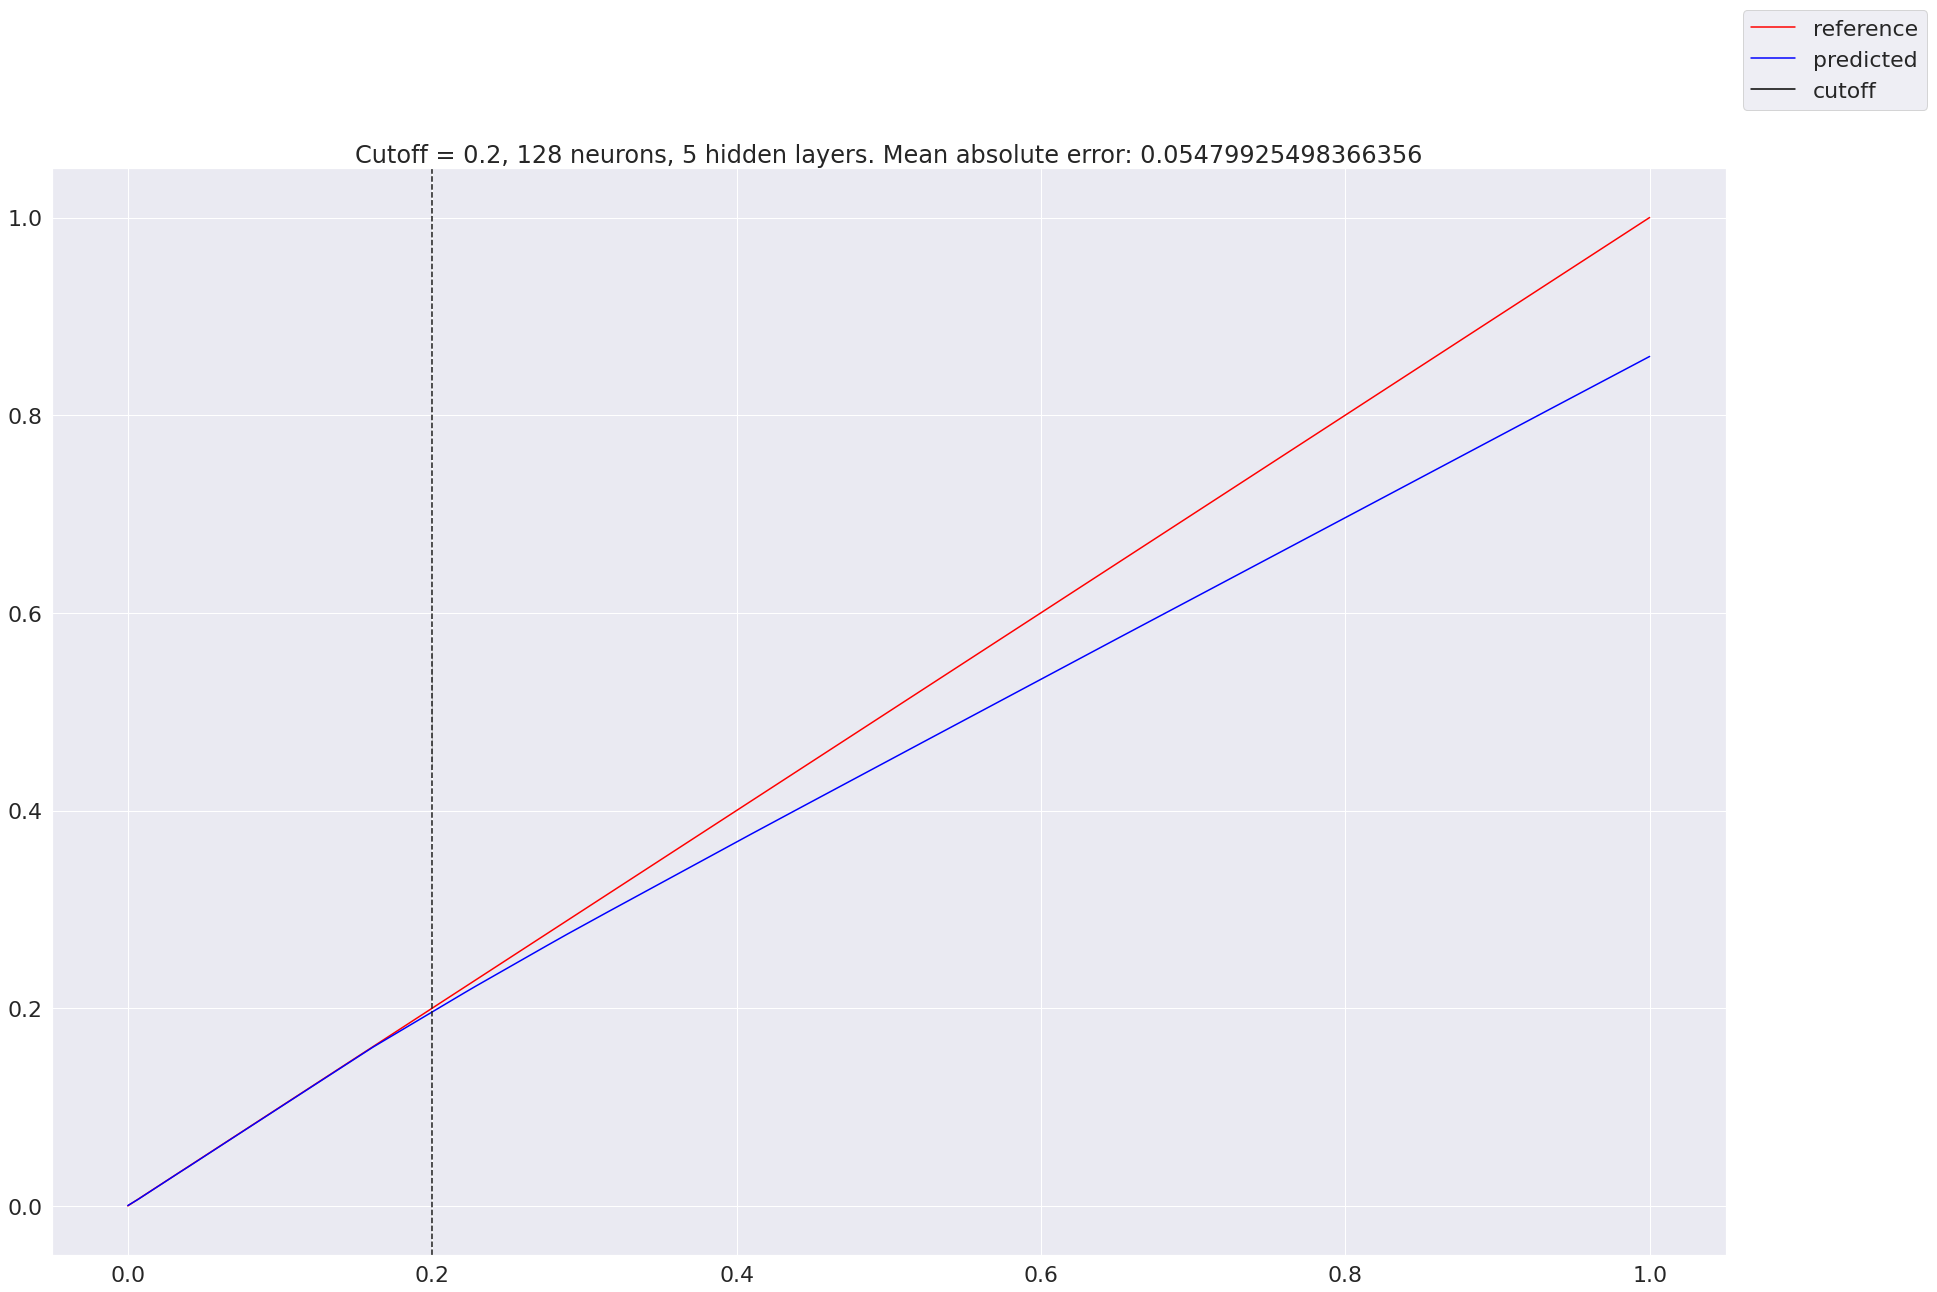

In [12]:
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

plot_results(grid, predicted, name, mean_absolute_error, 0.2)